In [1]:
from lppls import lppls_cmaes
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime as dt
%matplotlib inline

In [2]:
# Download S&P 500 historical data
data = yf.download('GC=F', start='2024-12-18', progress=False)

YF.download() has changed argument auto_adjust default to True


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2024-12-18,2636.500000,2647.100098,2590.199951,2644.300049,566
2024-12-19,2592.199951,2610.300049,2582.100098,2582.100098,238
2024-12-20,2628.699951,2631.600098,2604.899902,2605.300049,592
2024-12-23,2612.300049,2627.699951,2611.100098,2620.000000,451
2024-12-24,2620.000000,2620.000000,2609.500000,2613.000000,35


In [10]:
# convert time to ordinal
time = np.array([pd.Timestamp.toordinal(t1) for t1 in data.index])

In [11]:
time[:10]

array([739238, 739239, 739240, 739243, 739244, 739246, 739247, 739250,
       739251, 739253])

In [12]:
# create list of observation data
price = np.log(data['Close'].values).reshape(-1)

In [13]:
price[:10]

array([7.87720756, 7.8602622 , 7.87424469, 7.86798636, 7.8709296 ,
       7.87807957, 7.8698603 , 7.86561017, 7.87443488, 7.88566775])

In [14]:
# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

In [15]:
observations.shape

(2, 52)

In [16]:
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=5000, pop_size=4)
print(pd.Timestamp.fromordinal(int(tc)))

(80_w,160)-aCMA-ES (mu_w=42.4,w_1=5%) in dimension 3 (seed=106258, Tue Mar  4 21:13:10 2025)


Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1    160 4.136943670006590e-04 1.0e+00 1.02e+00  8e-02  2e+04 0:08.9
    2    320 4.127566571205613e-04 4.1e+00 9.78e-01  6e-02  7e+03 0:09.0
    3    480 4.109990453921184e-04 1.1e+01 1.04e+00  6e-02  5e+03 0:09.1
   34   5440 4.012982539616386e-04 8.2e+02 2.69e+00  1e-06  2e-03 0:11.8
2025-04-19 00:00:00


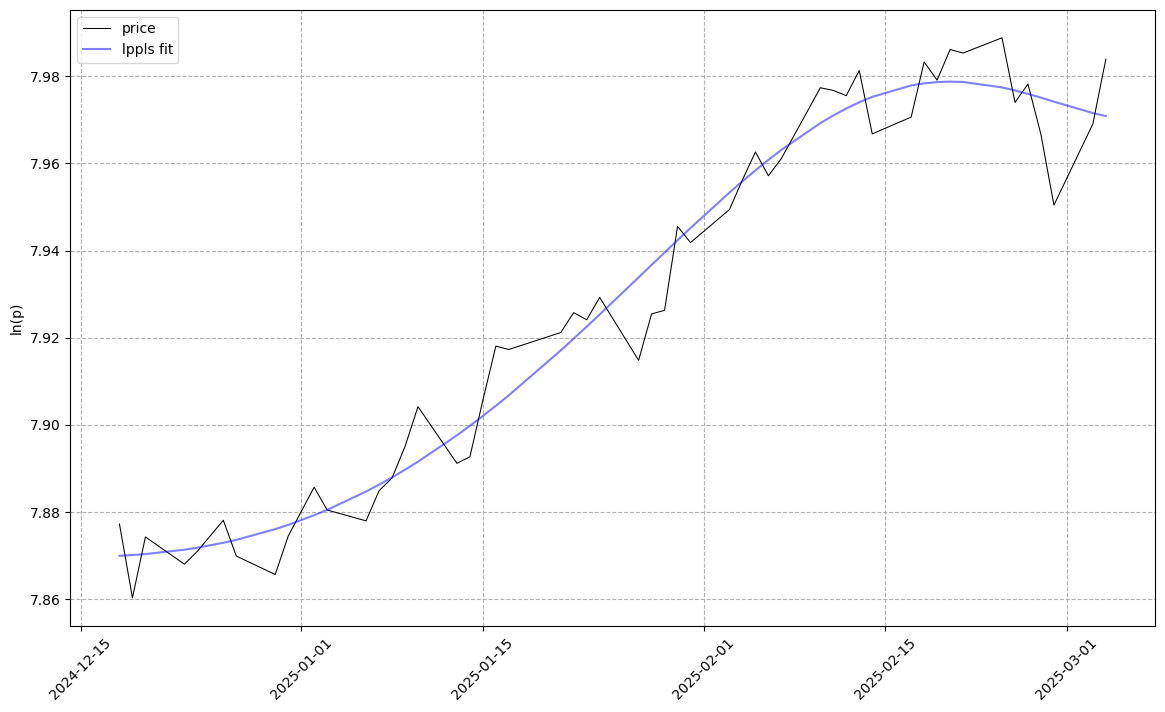

In [17]:
# visualize the fit
lppls_model.plot_fit()